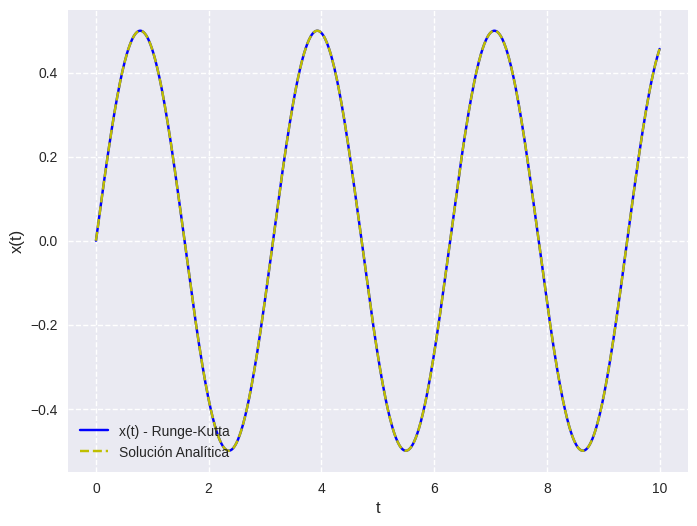

In [8]:
import numpy as np
import matplotlib.pyplot as plt

TPeriodo = np.pi
omega = 2*np.pi/TPeriodo
omega2=omega*omega

def f1(t,x1,x2):
  return -omega2*x2

def f2(t,x1,x2):
  return x1

def AnaliticSolution(t,omega):
    return np.sin(omega*t)/omega


def RungeKutta4(X1,X2,T,dt):
  for i in range(0,len(T)-1):
    t = T[i]
    x1 = X1[i]
    x2 = X2[i]

    dx11 = dt*f1(t,x1,x2)
    dx12 = dt*f2(t,x1,x2)

    dx21 = dt*f1(t+ (dt/2), (x1 + dx11/2), x2+dx12/2)
    dx22 = dt*f2(t+ (dt/2), (x1 + dx11/2), x2+dx12/2)


    dx31 = dt*f1(t+(dt/2),x1+(dx21/2), x2+ (dx22/2))
    dx32 = dt*f2(t+(dt/2),x1+(dx21/2), x2+ (dx22/2))

    dx41 = dt*f1(t+dt,x1+dx31, x2+dx32)
    dx42 = dt*f2(t+dt,x1+dx31, x2+dx32)


    X1[i+1]= x1 +(dx11+2*(dx21+dx31)+dx41)/6.0
    X2[i+1]= x2 +(dx12+2*(dx22+dx32)+dx42)/6.0

  return X1, X2




t=0
dt=0.01
limiteInf = 0
limiteSup = 10

T= np.arange(limiteInf,limiteSup+dt,dt)
lent = len(T)


X1=np.zeros(lent)
X2=np.zeros(lent)

X1[0] = 1
X2[0] = 0

X1,X2 = RungeKutta4(X1,X2,T,dt)




plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots( figsize=(8,6))


axes.plot(T, X2,'b' ,label="x(t) - Runge-Kutta")
axes.plot(T, AnaliticSolution(T, omega),'y', label="Solución Analítica",  linestyle='--')

#Se ajustan demás detalles del gráfico.
axes.set_xlabel('t', fontsize=12)
axes.set_ylabel(r'x(t)',fontsize=12)
axes.legend(loc='lower left')
axes.grid(True, linestyle='--')


plt.show()


